In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_fi = pd.read_csv("FI_values_cv_crf_plus_pw.csv")

In [3]:
data_fi

,Unnamed: 0,first,second,third
0,0,0.007188,0.007835,0.007152
1,1,0.007472,0.006203,0.007388
2,2,0.006439,0.008067,0.007366
3,3,0.024246,0.011298,0.008913
4,4,0.012934,0.008980,0.009595
...,...,...,...,...
59,59,0.000000,0.000000,0.012555
60,60,0.000000,0.000000,0.000000
61,61,0.006485,0.006465,0.005039
62,62,0.100808,0.106976,0.100026


In [4]:
data_fi = data_fi.drop(['Unnamed: 0'], axis=1)

In [5]:
data_fi

,first,second,third
0,0.007188,0.007835,0.007152
1,0.007472,0.006203,0.007388
2,0.006439,0.008067,0.007366
3,0.024246,0.011298,0.008913
4,0.012934,0.008980,0.009595
...,...,...,...
59,0.000000,0.000000,0.012555
60,0.000000,0.000000,0.000000
61,0.006485,0.006465,0.005039
62,0.100808,0.106976,0.100026


In [6]:
data_fi = data_fi.round(3)

In [7]:
data_fi

,first,second,third
0,0.007,0.008,0.007
1,0.007,0.006,0.007
2,0.006,0.008,0.007
3,0.024,0.011,0.009
4,0.013,0.009,0.010
...,...,...,...
59,0.000,0.000,0.013
60,0.000,0.000,0.000
61,0.006,0.006,0.005
62,0.101,0.107,0.100


In [8]:
data_fi['mean'] = round(data_fi.mean(axis=1),3)

In [9]:
data_fi

,first,second,third,mean
0,0.007,0.008,0.007,0.007
1,0.007,0.006,0.007,0.007
2,0.006,0.008,0.007,0.007
3,0.024,0.011,0.009,0.015
4,0.013,0.009,0.010,0.011
...,...,...,...,...
59,0.000,0.000,0.013,0.004
60,0.000,0.000,0.000,0.000
61,0.006,0.006,0.005,0.006
62,0.101,0.107,0.100,0.103


In [10]:
data_for_names = pd.read_csv("cv_x_under.csv")

In [11]:
data_for_names.head()

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.80270,0.12973,0.202700,0.25253,0.28378,0.51892,0.54688,0.16162,0.17027,...,0,0,0,1,0,0,0,1,1,0
1,1,0.80270,0.14595,0.210810,0.26263,0.30811,0.49459,0.62295,0.18182,0.18649,...,0,0,1,0,0,1,0,0,1,0
2,2,0.76154,0.12308,0.200000,0.26263,0.28462,0.47692,0.59677,0.16162,0.16154,...,0,1,0,1,0,0,0,1,0,1
3,3,0.94286,0.31429,0.095238,0.10101,0.35238,0.59048,0.59677,0.33333,0.27619,...,0,0,0,1,0,0,0,1,1,0
4,4,0.71566,0.22410,0.231330,0.32323,0.42651,0.28916,1.47500,0.31313,0.36867,...,0,0,1,0,0,0,0,1,1,0


In [12]:
data_for_names = data_for_names.drop(['Unnamed: 0'], axis=1)

In [14]:
data_for_names.shape

(20602, 64)

In [13]:
data_for_names.columns

Index(['T', 'delta_t', 'CT', 'prop_s', 't_sys', 't_dia', 't_ratio',
       'prop_delta_t', 't_p1in_dia', 't_p2in_dia', 't_b_c', 't_b_d',
       'pulse_amp', 'pulse_amp_p1', 'pulse_amp_p2', 'AP', 'AI', 'dia_amp',
       'RI', 'RI_p1', 'RI_p2', 'ratio_p2_p1', 'A1', 'A2', 'IPA', 'ms',
       'ms_div_amp', 'b_div_a', 'c_div_a', 'd_div_a', 'e_div_a', 'a_div_amp',
       'b_div_amp', 'c_div_amp', 'd_div_amp', 'e_div_amp', 'AGI', 'AGI_inf',
       'AGI_mod', 'slope_b_c', 'slope_b_d', 'IPAD', 'k', 'CT_div_ht', 'SI',
       'Age when attended assessment centre', 'mean sbp', 'BMI',
       'cholesterol HDL ratio', 'Diabetes diagnosed by doctor_No',
       'Diabetes diagnosed by doctor_Prefer not to answer',
       'Diabetes diagnosed by doctor_Yes', 'Smoking status_Current',
       'Smoking status_Never', 'Smoking status_Prefer not to answer',
       'Smoking status_Previous', 'Sex_Female', 'Sex_Male',
       'Ethnic background_Asian', 'Ethnic background_Black',
       'Ethnic background_other in

In [15]:
df_scores = pd.DataFrame(data_fi['mean'])

In [16]:
df_columns = pd.DataFrame(data_for_names.columns)

In [17]:
feature_scores = pd.concat([df_columns, df_scores], axis =1)

In [18]:
feature_scores.columns = ['Feature_Name', 'Score']

In [19]:
feature_scores

,Feature_Name,Score
0,T,0.007
1,delta_t,0.007
2,CT,0.007
3,prop_s,0.015
4,t_sys,0.011
...,...,...
59,Ethnic background_Black,0.004
60,Ethnic background_other including mixed,0.000
61,Ethnic background_white/not recorded,0.006
62,bp medication_0.0,0.103


In [20]:
# ordering

In [21]:
data_use = feature_scores.nlargest(64, 'Score')

In [22]:
data_use

,Feature_Name,Score
63,bp medication_1.0,0.116
62,bp medication_0.0,0.103
45,Age when attended assessment centre,0.075
56,Sex_Female,0.058
57,Sex_Male,0.049
...,...,...
59,Ethnic background_Black,0.004
55,Smoking status_Previous,0.003
50,Diabetes diagnosed by doctor_Prefer not to answer,0.000
54,Smoking status_Prefer not to answer,0.000


In [23]:
data_use_15 = data_use.iloc[:15]

In [24]:
data_use_15

,Feature_Name,Score
63,bp medication_1.0,0.116
62,bp medication_0.0,0.103
45,Age when attended assessment centre,0.075
56,Sex_Female,0.058
57,Sex_Male,0.049
46,mean sbp,0.028
40,slope_b_d,0.027
51,Diabetes diagnosed by doctor_Yes,0.024
49,Diabetes diagnosed by doctor_No,0.023
39,slope_b_c,0.022


In [25]:
plotting_names = data_use_15['Feature_Name']

In [26]:
plotting_values = data_use_15['Score']

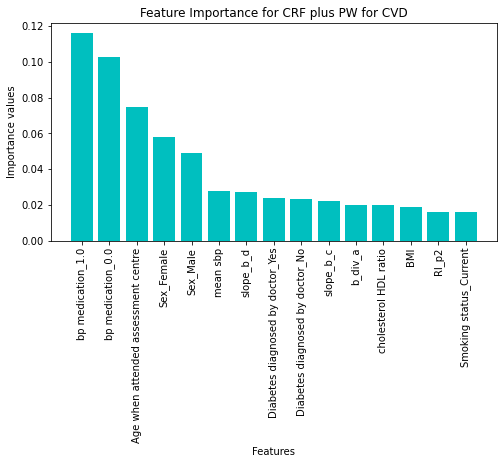

In [27]:
fig = plt.figure(figsize = (8, 4))
plt.bar(plotting_names, plotting_values, color ='c',
        width = 0.8)
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.ylabel("Importance values")
plt.title("Feature Importance for CRF plus PW for CVD")
plt.show()